Importação das Bibliotecas utilizadas

In [1]:
import numpy as np
import cv2

import matplotlib.pyplot as plt

Função auxiliar para captura de pixels maiores que 0

In [2]:
def meu_max(A, B):
  n = len(A)
  output = []
  vec = []

  for i in range(0, n):
    m = len(A[i])

    for j in range(0, m):
      if(A[i][j] > B[i][j]):
        vec.append(A[i][j])

      else:
        vec.append(B[i][j])
      
    output.append(vec)
    vec = []
  
  return output

Operação de convolução

In [3]:
def Conv(src, kernel):
    #print(kernel)
    m, n = kernel.shape

    d = int((m-1)/2)
    h, w = src.shape[0], src.shape[1]

    dst = np.zeros((h, w))

    for y in range(d, h - d):
        for x in range(d, w - d):
          
            dst[y][x] = np.sum(src[y-d:y+d+1, x-d:x+d+1]*kernel)

    return dst

Construção do conjunto de kernels

In [4]:
def build_filters(k):
    
    filters = []
    ksize = k

    for theta in np.arange(0, np.pi, np.pi / 16):
        
        kern = cv2.getGaborKernel((ksize, ksize), 4.0, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F)
        filters.append(kern)

    return filters

def process(img, filters):
    
    accum = np.zeros_like(img)

    for kern in filters:
        fimg = Conv(img, kern)
        accum = meu_max(fimg, accum)

    return accum

Execução

In [16]:
img_parh = '/content/Pato.jpg'
img = cv2.imread(img_parh)

img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

filters = build_filters(30)

res1 = process(img, filters)

In [17]:
plt.rcParams['figure.figsize'] = [10, 10]

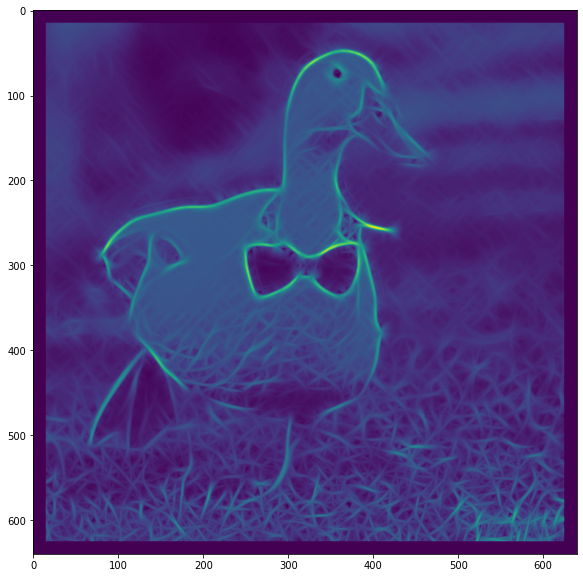

In [18]:
plt.imshow(res1)

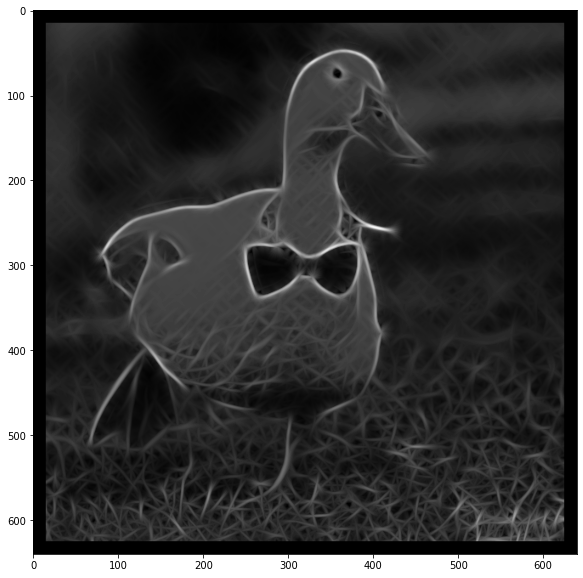

In [15]:
plt.imshow(res1, cmap='gray')